## Problem Statement:
### Finding the key factors driving Prosper Score and Borrower's APR 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
# Code to ignore warnings generated by python

import warnings
warnings.filterwarnings('ignore')

In [15]:
# Setting maximum number of rows and columns for display purpose

pd.set_option('display.max_rows',100)
pd.set_option('display.max.columns',100)

In [16]:
loan = pd.read_csv('loan_cleaned_df.csv')
loan.shape

(83397, 15)

###  Dataset Summary
#### Loan dataset is read here post cleaning from exploratory phase of data visualization.
#### It consists of 83397 rows, 15 columns after removing missing values.
#### Different attributes influencing Prosper Score and Borrower's APR are analysed and findings are shared in this slideshow

### BorrowerAPR distribution
#### Most customers have borrowed loan at the annual percentage rate of 0.37, mean comes around 0.22, Highest is 0.43 and the lowest is 0.05

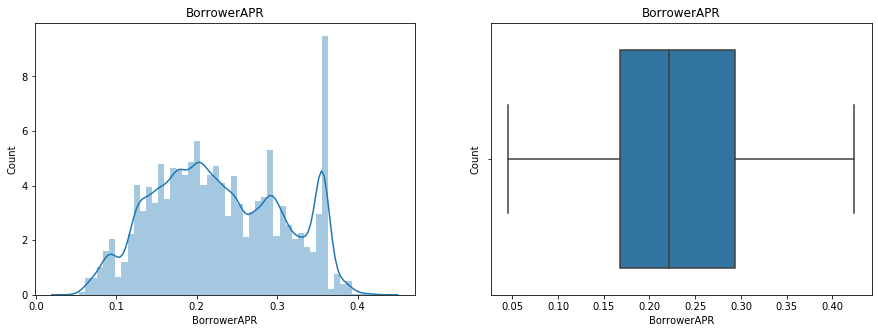

In [17]:


plt.figure(figsize=(15,5))

plt.subplot(121)
plt.ylabel('Count')
plt.title('BorrowerAPR')
sns.distplot(loan['BorrowerAPR']);
plt.subplot(122)
plt.ylabel('Count')
plt.title('BorrowerAPR')
sns.boxplot(loan['BorrowerAPR']);

### Employment Status of Customers
#### Around 79 % of customers are employed, also there are columns such as Full-time, part-time which are seperated from Employed
#### May be Employed column could have been ommitted during data gathering process and right information should have been filled up in other columns


<Figure size 1440x720 with 0 Axes>

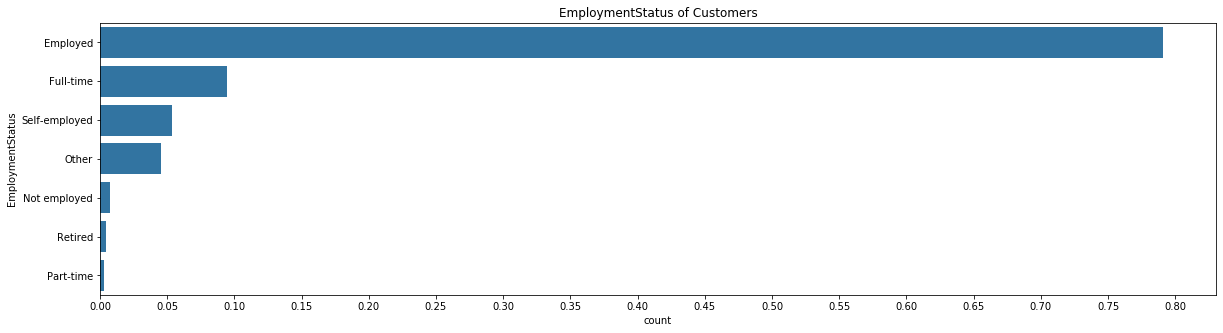

In [18]:
# Around 79 % of customers are employed, also there are columns such as Full-time, part-time which are seperated from Employed
# May be Employed column could have been ommitted during data gathering process and right information should have been filled up in other columns

plt.figure(figsize = (20,10))

perc = loan['EmploymentStatus'].value_counts(normalize = True)
ordered = perc.index
ticks_p = np.arange(0.00,perc.max()+0.01,0.05)
ticks_l = ['{:0.2f}'.format(val) for val in ticks_p]
plt.figure(figsize = (20,5))
plt.title('EmploymentStatus of Customers')
sns.countplot(data = loan, y = 'EmploymentStatus',color=sns.color_palette()[0], order = ordered);
plt.xticks(ticks_p*loan.shape[0],ticks_l);

### BorrowerAPR and Term values for various Employment Status
#### Unemployed customers who have chosen 36 months as the term for loan have the highest borrower APR
#### Maximum APR charged for the customers who have chosen 36,12months as term is same for all irrespective of employment statuses


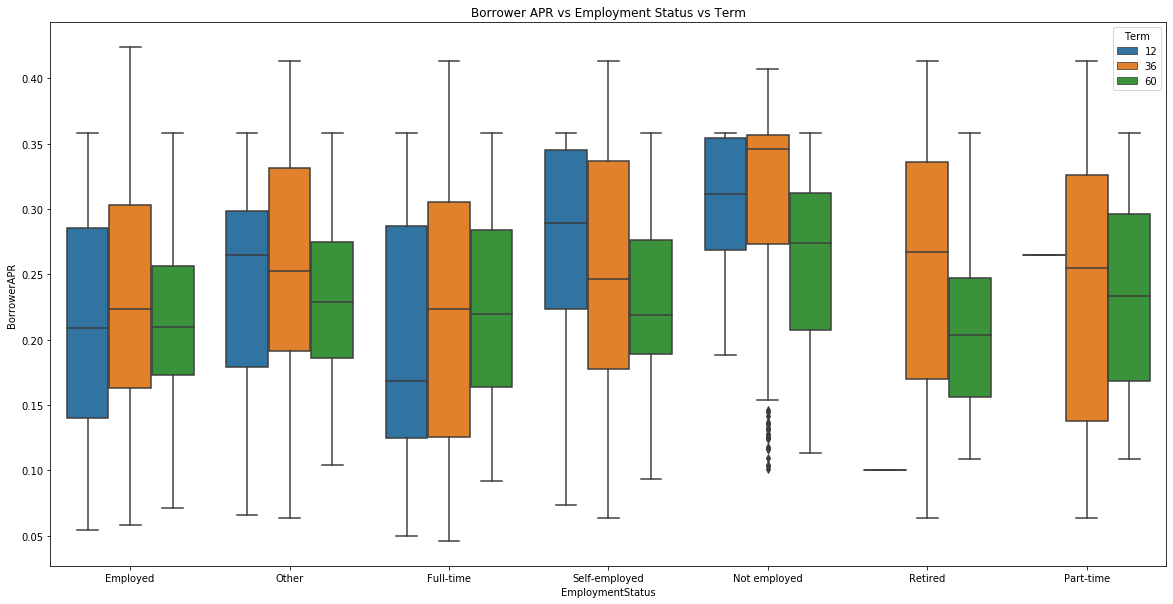

In [19]:

plt.figure(figsize = [20,10])
plt.title('Borrower APR vs Employment Status vs Term')
sns.boxplot(data = loan, y = 'BorrowerAPR', x = 'EmploymentStatus', hue = 'Term');

### Relationship between MonthlyLoanPayment and ProsperScore
#### Higher the monthly payment, better is the Prosper score and vice versa

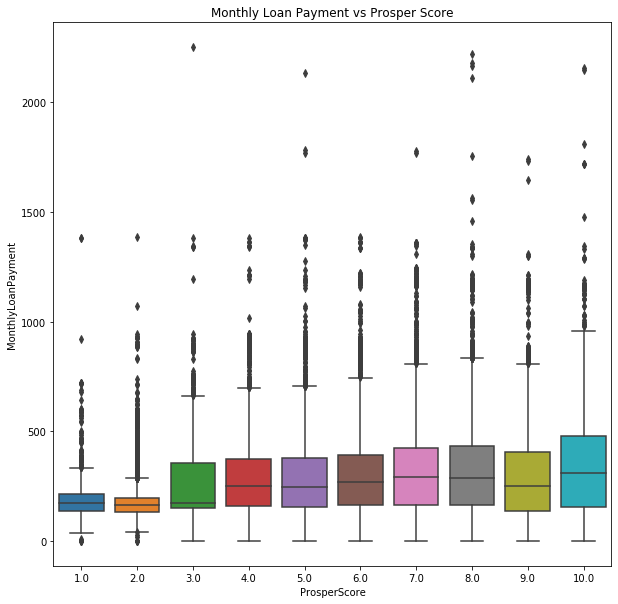

In [20]:

plt.figure(figsize = (10,10))
plt.title('Monthly Loan Payment vs Prosper Score')
sns.boxplot(y = 'MonthlyLoanPayment', x = 'ProsperScore', data = loan);

### Distribution of ProsperScore
#### Low number of customers are given 1 as the prosper score, most of them are given score between 4 and 8

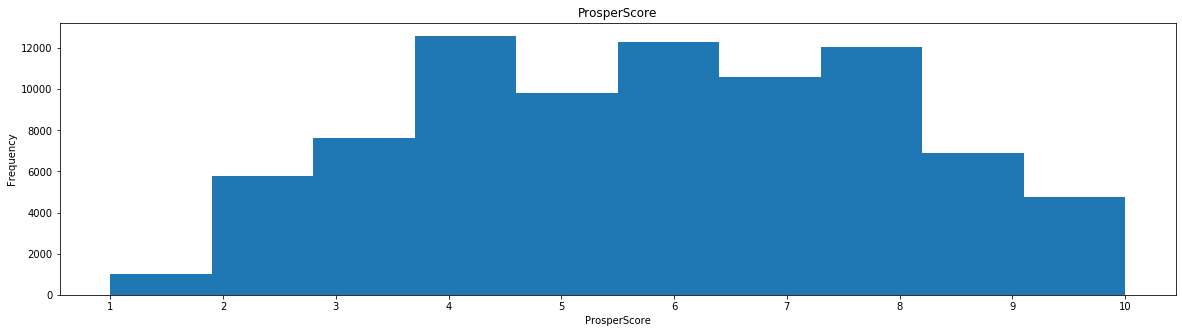

In [21]:
plt.figure(figsize = (20,5))
plt.xlabel('ProsperScore')
plt.title('ProsperScore')
loan['ProsperScore'].plot.hist(color=sns.color_palette()[0]);
plt.xticks(np.arange(1,loan['ProsperScore'].max()+1,1));

### Distribution of IsBorrowerHomeowner Attribute
#### Customers having own property seem to be applying for loan more than not being a owner customers though there is no much of a difference between their proportion


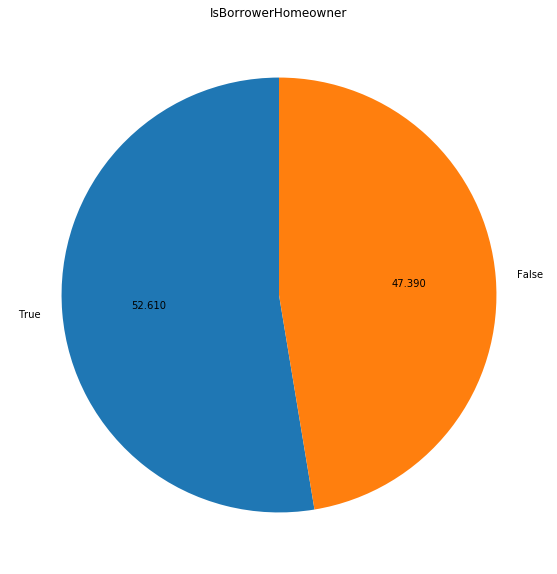

In [22]:

plt.figure(figsize = [20,10])
s = loan['IsBorrowerHomeowner'].value_counts()
plt.title('IsBorrowerHomeowner')
plt.pie(s, labels = s.index, autopct = '%1.3f', startangle = 90);

### Borrower APR and Prosper Score for HomeOwner attribute
#### Mean of Borrower APR is lower for home owners compared to Mean of Borrower APR of non home owners 
#### Borrower APR and Prosper Score are negatively correlated

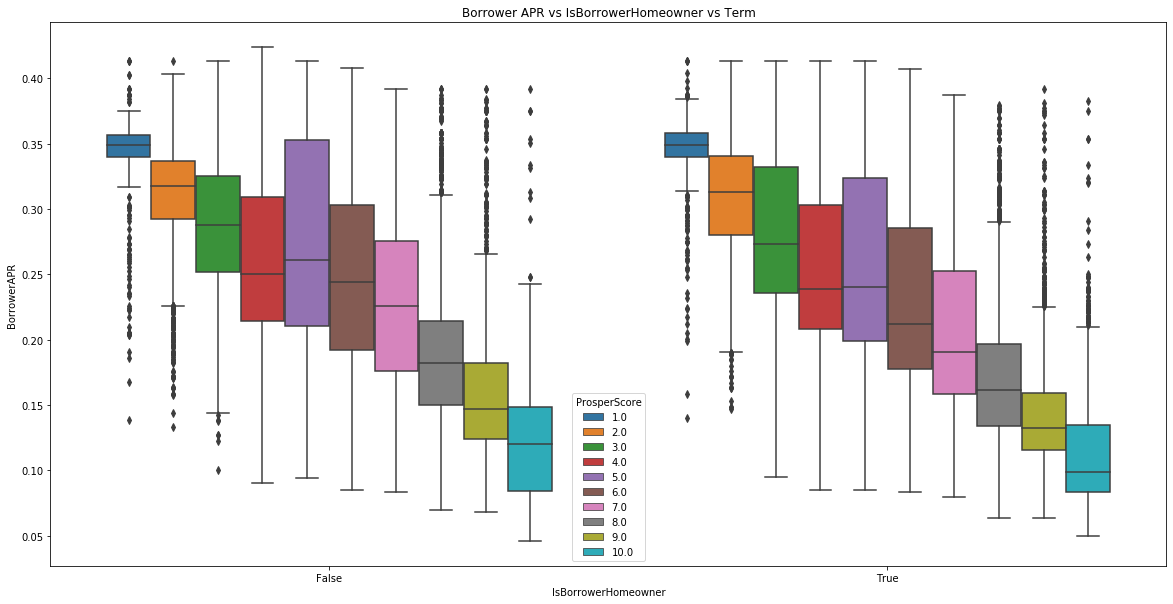

In [23]:

plt.figure(figsize = [20,10])
plt.title('Borrower APR vs IsBorrowerHomeowner vs Term')
sns.boxplot(data = loan, y = 'BorrowerAPR' , x = 'IsBorrowerHomeowner', hue = 'ProsperScore');

## Key Findings:
### Unemployed customers who have chosen 36 months as the term for loan have the highest borrower APR It could be because of high risk involved in lending loan to unemployed since there was no fixed income at the time of applying loan
### Maximum APR charged for the customers who have chosen 36,12months as term is same for all irrespective of employment statuses
### Mean of Borrower APR is lower for home owners compared to Mean of Borrower APR of non home owners
### Borrower APR and Prosper Score are negatively correlated